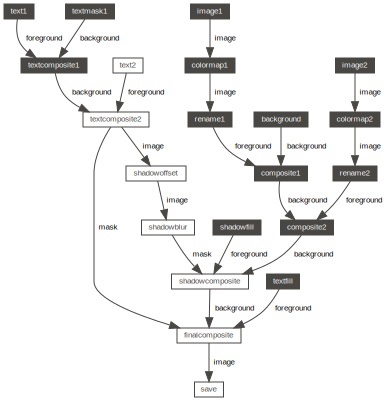

In [1]:
import graphcat
import graphcat.diagram
import graphcat.notebook

tasks = [
    "text1",
    "textmask1",
    "textcomposite1",
    "text2",
    "textcomposite2",
    "shadowoffset",
    "shadowblur",
    "shadowfill",
    "shadowcomposite",
    "finalcomposite",
    "save",
    "textfill",
    "image1",
    "colormap1",
    "rename1",
    "composite1",
    "image2",
    "colormap2",
    "rename2",
    "composite2",
    "background",
]

graph = graphcat.StaticGraph()
for task in tasks:
    graph.add_task(task)

graph.add_links("text1", ("textcomposite1", "foreground"))
graph.add_links("textmask1", ("textcomposite1", "background"))
graph.add_links("text2", ("textcomposite2", "foreground"))
graph.add_links("textcomposite1", ("textcomposite2", "background"))
graph.add_links("textcomposite2", ("shadowoffset", "image"))
graph.add_links("textcomposite2", ("finalcomposite", "mask"))
graph.add_links("shadowoffset", ("shadowblur", "image"))
graph.add_links("shadowblur", ("shadowcomposite", "mask"))
graph.add_links("shadowfill", ("shadowcomposite", "foreground"))
graph.add_links("shadowcomposite", ("finalcomposite", "background"))
graph.add_links("textfill", ("finalcomposite", "foreground"))
graph.add_links("finalcomposite", ("save", "image"))
graph.add_links("image1", ("colormap1", "image"))
graph.add_links("image2", ("colormap2", "image"))
graph.add_links("colormap1", ("rename1", "image"))
graph.add_links("colormap2", ("rename2", "image"))
graph.add_links("rename1", ("composite1", "foreground"))
graph.add_links("background", ("composite1", "background"))
graph.add_links("composite1", ("composite2", "background"))
graph.add_links("rename2", ("composite2", "foreground"))
graph.add_links("composite2", ("shadowcomposite", "background"))

graph.update("save")
graph.mark_unfinished("text2")

diagram = graphcat.diagram.draw(graph, rankdir="TB")
graphcat.notebook.display(diagram)
diagram.draw(path="workflow.svg", prog="dot", format="svg")